In [37]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

from helpers import model_report_from

In [38]:
ft_train = np.load("./processed_data/features_train.npy")
ft_test = np.load("./processed_data/features_test.npy")
lbl_train = np.load("./processed_data/labels_train.npy")
lbl_test = np.load("./processed_data/labels_test.npy")

## Finding the principal components that preserve the majority of the information

In [39]:
# get dimension of features
ft_train.shape

(4088, 20)

In [40]:
pca = PCA(n_components=19, svd_solver="full")
ft_train_8D = pca.fit_transform(ft_train)

In [41]:
evr = pca.explained_variance_ratio_

In [42]:
for i in range(1,19):
    print(f"{i} principle components, proportion of variance preserved: {evr[:i].sum()}")

1 principle components, proportion of variance preserved: 0.24353346025768122
2 principle components, proportion of variance preserved: 0.38623892670543514
3 principle components, proportion of variance preserved: 0.4963468951778873
4 principle components, proportion of variance preserved: 0.5901778886078559
5 principle components, proportion of variance preserved: 0.6801304205830012
6 principle components, proportion of variance preserved: 0.7643717645633797
7 principle components, proportion of variance preserved: 0.8183866293850891
8 principle components, proportion of variance preserved: 0.8608836404436087
9 principle components, proportion of variance preserved: 0.8925304919109232
10 principle components, proportion of variance preserved: 0.9224467491119339
11 principle components, proportion of variance preserved: 0.9426778225161033
12 principle components, proportion of variance preserved: 0.9622506124821646
13 principle components, proportion of variance preserved: 0.9792080030

## Performing PCA

In [43]:
# seems like 10 principle components will do
pca = PCA(n_components=0.92, svd_solver="full")
ft_train_red = pca.fit_transform(ft_train)

In [44]:
ft_train_red.shape

(4088, 10)

In [45]:
# get the reduced dimension test set
ft_test_red = pca.transform(ft_test)

In [46]:
ft_test_red.shape

(1022, 10)

## Save results

In [47]:
np.save("./processed_data/features_train_red", ft_train_red)
np.save("./processed_data/features_test_red", ft_test_red)

---------------------------------------------------------------------------------------------
## Trying it out?

In [48]:

clf = Pipeline([
    ("pca", PCA()),
    ("lr", LogisticRegression(class_weight='balanced')) 
])
param_grid = [{
    "pca__n_components": [2,3,5,6,8,10,11,13,14,15],
    "lr__C": [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5]
}]

gs = GridSearchCV(clf, param_grid, cv=3) 
gs.fit(ft_train, lbl_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('lr',
                                        LogisticRegression(class_weight='balanced'))]),
             param_grid=[{'lr__C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1,
                                    0.3, 0.5, 1, 2, 3, 3, 4, 5],
                          'pca__n_components': [2, 3, 5, 6, 8, 10, 11, 13, 14,
                                                15]}])

In [49]:
gs.best_params_

{'lr__C': 0.001, 'pca__n_components': 2}

In [50]:
pca = PCA(n_components=5)
ft_train_red = pca.fit_transform(ft_train)

In [51]:
lr = LogisticRegression(class_weight='balanced', C=0.001)
lr.fit(ft_train_red, lbl_train)

LogisticRegression(C=0.001, class_weight='balanced')

accuracy = 0.7221135029354208
precision = 0.10204081632653061
recall = 0.6
f1 = 0.1744186046511628
ROC AUC score = 0.6641975308641975


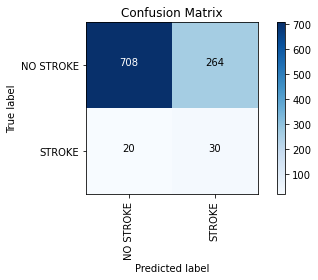

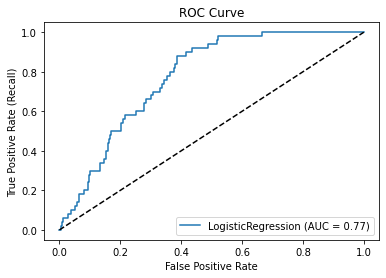

In [52]:
# log reg w/ reduced dimension
model_report_from(lr, pca.fit_transform(ft_test), lbl_test, [])

accuracy = 0.7299412915851272
precision = 0.12828947368421054
recall = 0.78
f1 = 0.22033898305084748
ROC AUC score = 0.7536831275720165


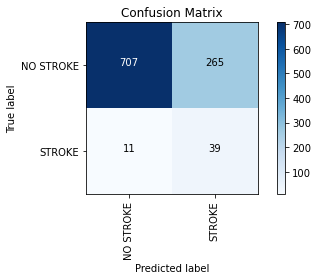

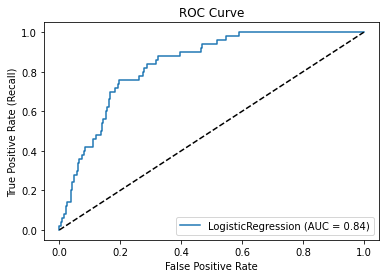

In [53]:
# vanilla log reg
lr.fit(ft_train, lbl_train)
model_report_from(lr, ft_test, lbl_test, [])